In [2]:
import seaborn as sns
import pandas as pd
import scipy.stats as stats

In [17]:
df = pd.read_excel("./daria_computer_readable.xlsx")
df["Jelito Cienkie"] = df["Długość dwunastnicy "] + df["Długość jelita czczego "] + df["Długość jelita biodrowego  "]
df["Jelito Grube"] = ((df["Długość jelita ślepiego P"].replace("BRAK", pd.NA) + df["Długość jelita ślepiego P"]) / 2) + df["Okrężnica z odbytnicą "]

<Axes: xlabel='Jelito Cienkie', ylabel='Count'>

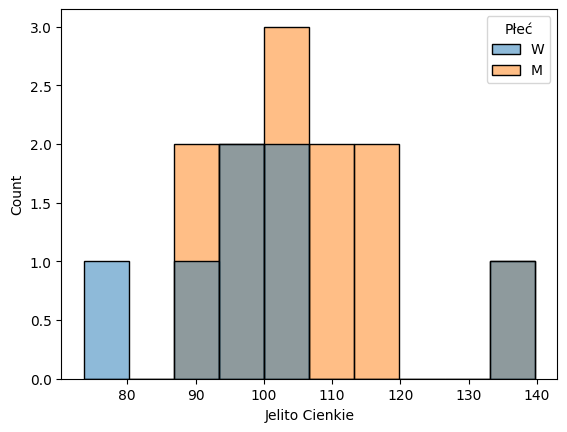

In [ ]:
sns.histplot(data=df, x="Jelito Cienkie", hue="Płeć", stat="count", bins=10)

<Axes: xlabel='Jelito Grube', ylabel='Count'>

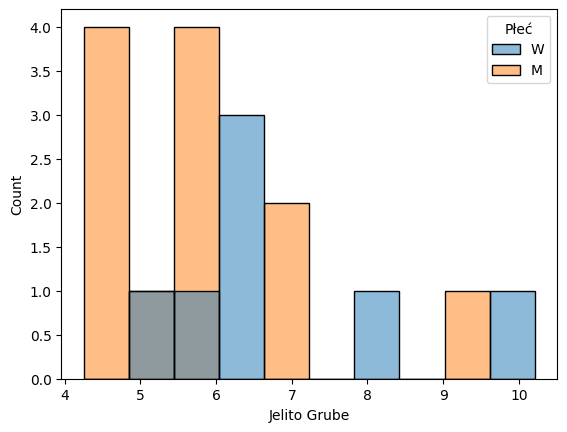

In [18]:
sns.histplot(data=df, x="Jelito Grube", hue="Płeć", stat="count", bins=10)

<Axes: xlabel='C/G Ratio', ylabel='Count'>

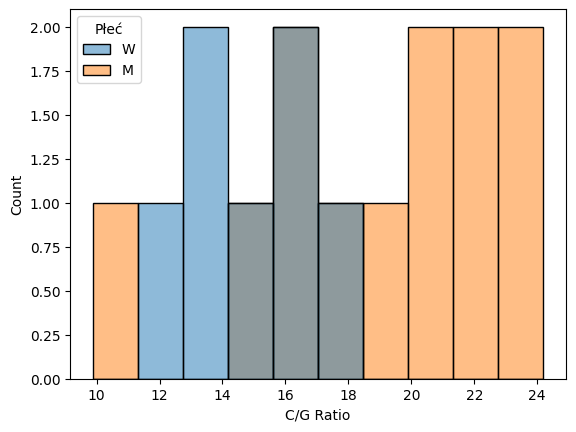

In [20]:
df["C/G Ratio"] = df["Jelito Cienkie"] / df["Jelito Grube"]
sns.histplot(data=df, x="C/G Ratio", hue="Płeć", stat="count", bins=10)

<Axes: xlabel='Płeć', ylabel='C/G Ratio'>

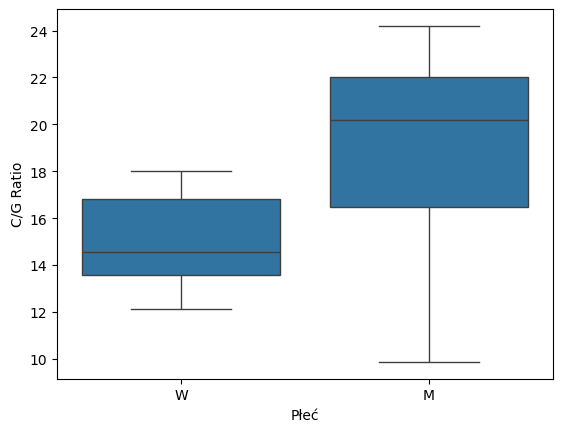

In [41]:
sns.boxplot(x="Płeć", y="C/G Ratio", data=df)

In [34]:
f = df["C/G Ratio"][df["Płeć"] == "W"].dropna().astype(float)
m = df["C/G Ratio"][df["Płeć"] == "M"].dropna().astype(float)

In [35]:
f.mean(), m.mean()

(np.float64(15.079696873661215), np.float64(19.029747743639874))

In [36]:
f.std(), m.std()

(np.float64(2.1599226616064713), np.float64(4.141197461376477))

In [37]:
stats.shapiro(f), stats.shapiro(m)

(ShapiroResult(statistic=np.float64(0.9320733827714044), pvalue=np.float64(0.5686686279241203)),
 ShapiroResult(statistic=np.float64(0.9317061108586379), pvalue=np.float64(0.39854727235456533)))

In [38]:
stats.mannwhitneyu(f, m)

MannwhitneyuResult(statistic=np.float64(17.0), pvalue=np.float64(0.03584186711121696))

<Axes: xlabel='Długość jelit', ylabel='Count'>

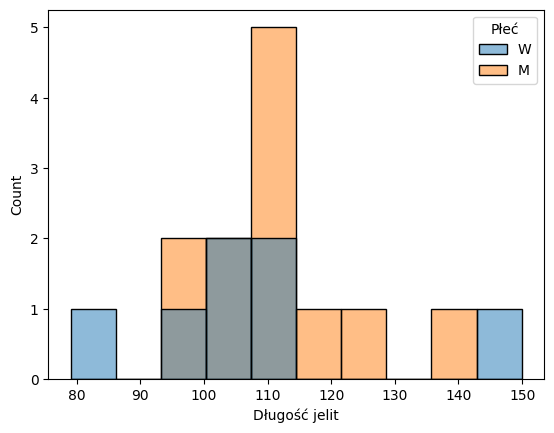

In [52]:
df["Długość jelit"] = df["Jelito Cienkie"] + df["Jelito Grube"]
df["Długość jelit"] = df["Długość jelit"].replace("BRAK", pd.NA).dropna().astype(float)
sns.histplot(data=df, x="Długość jelit", hue="Płeć", stat="count", bins=10)

<Axes: xlabel='Płeć', ylabel='Długość jelit'>

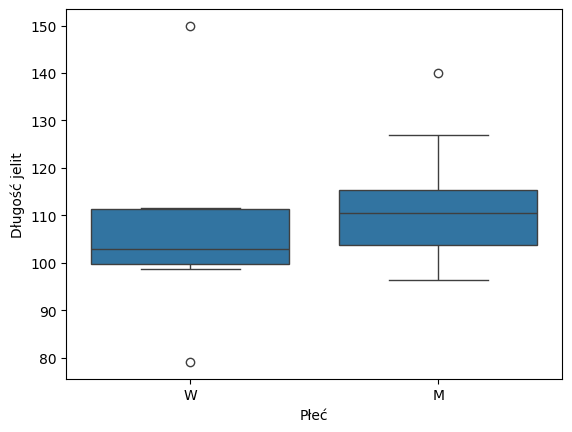

In [53]:
sns.boxplot(x="Płeć", y="Długość jelit", data=df)

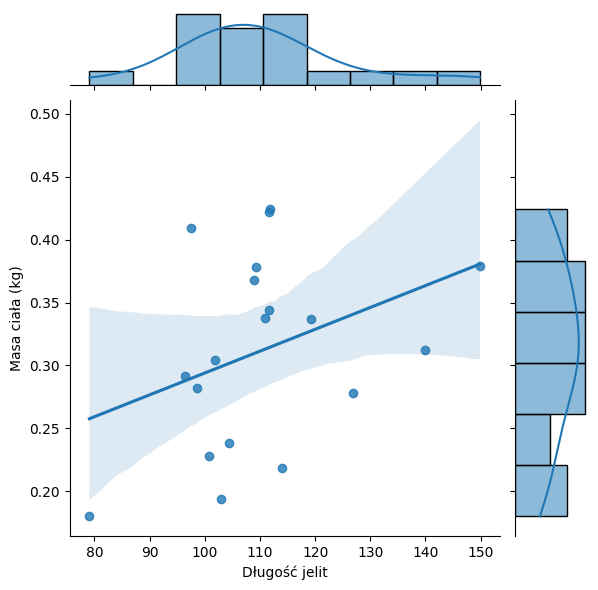

In [54]:
sns.jointplot(x="Długość jelit", y="Masa ciała (kg)", data=df, kind='reg')

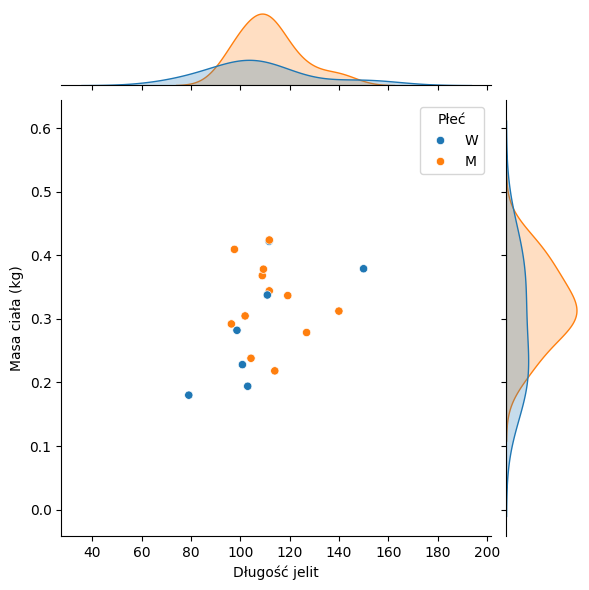

In [55]:
sns.jointplot(x="Długość jelit", y="Masa ciała (kg)", data=df, hue="Płeć")